In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import gzip
import lasagne
from lasagne import layers
from nolearn.lasagne import NeuralNet
from lasagne.updates import sgd
from utility import *
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * f

In [2]:
pylab.rcParams['figure.figsize'] = (15, 9)
sys.setrecursionlimit(10000)
conv2d1_filters_numbers = 8
conv2d1_filters_size = 9
conv2d2_filters_numbers = 8
conv2d2_filters_size = 1
conv2d3_filters_numbers = 1
conv2d3_filters_size = 5

down_sample_ratio = 16
learning_rate = 0.00001
epochs = 10
HiC_max_value = 100

In [3]:
low_resolution_samples = np.load(gzip.GzipFile('../data/GM12878_replicate_down16_chr19_22.npy.gz', "r")) * down_sample_ratio
high_resolution_samples = np.load(gzip.GzipFile('../data/GM12878_replicate_original_chr19_22.npy.gz', "r"))
low_resolution_samples, high_resolution_samples, cache = loadData(40, 40, 28, 28, root="../../")
low_resolution_samples = low_resolution_samples.reshape(-1, 1, 40, 40)
high_resolution_samples = high_resolution_samples.reshape(-1, 1, 40, 40)

Starting to load data...
expected:  17 17
actual: 17 17 289
expected:  17 17
actual: 17 17 289
expected:  17 16
actual: 17 16 272
expected:  17 16
actual: 17 16 272
expected:  17 13
actual: 17 13 221
expected:  17 13
actual: 17 13 221
expected:  17 13
actual: 17 13 221
expected:  17 13
actual: 17 13 221
expected:  17 12
actual: 17 12 204
expected:  17 12
actual: 17 12 204
expected:  17 11
actual: 17 11 187
expected:  17 11
actual: 17 11 187
expected:  17 10
actual: 17 10 170
expected:  17 10
actual: 17 10 170
expected:  17 10
actual: 17 10 170
expected:  17 10
actual: 17 10 170
expected:  17 9
actual: 17 9 153
expected:  17 9
actual: 17 9 153
expected:  17 9
actual: 17 9 153
expected:  17 9
actual: 17 9 153
expected:  17 9
actual: 17 9 153
expected:  17 9
actual: 17 9 153
expected:  17 9
actual: 17 9 153
expected:  17 9
actual: 17 9 153
expected:  17 7
actual: 17 7 119
expected:  17 7
actual: 17 7 119
expected:  17 7
actual: 17 7 119
expected:  17 7
actual: 17 7 119
expected:  17 6
act

finished loading data


In [4]:
print(low_resolution_samples.shape)
print(high_resolution_samples.shape)

(20022, 1, 40, 40)
(20022, 1, 40, 40)


In [5]:
sample_size = low_resolution_samples.shape[-1]
padding = conv2d1_filters_size + conv2d2_filters_size + conv2d3_filters_size - 3
half_padding = padding // 2
output_length = sample_size - padding
print(sample_size)
print(output_length)

40
28


In [6]:
Y = high_resolution_samples[:, 0, half_padding:(sample_size-half_padding), half_padding:(sample_size-half_padding)]
Y = Y.reshape(Y.shape[0], -1)
X = low_resolution_samples

In [7]:
print(X.shape)
print(Y.shape)

(20022, 1, 40, 40)
(20022, 784)


In [8]:
net1 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv2d1', layers.Conv2DLayer),
        ('conv2d2', layers.Conv2DLayer),
        ('conv2d3', layers.Conv2DLayer),
        ('output_layer', layers.FlattenLayer),
        ],
    input_shape=(None, 1, sample_size, sample_size),
    conv2d1_num_filters=conv2d1_filters_numbers,
    conv2d1_filter_size = (conv2d1_filters_size, conv2d1_filters_size),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),
    conv2d2_num_filters=conv2d2_filters_numbers,
    conv2d2_filter_size = (conv2d2_filters_size, conv2d2_filters_size),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d3_num_filters=conv2d3_filters_numbers,
    conv2d3_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d3_filter_size = (conv2d3_filters_size, conv2d3_filters_size),
    update=sgd,
    update_learning_rate = learning_rate,
    regression=True,
    max_epochs= epochs,
    verbose=1,
    )

In [9]:
net1.fit(X, Y)

/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/site-packages/lasagne/layers/conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)


# Neural Network with 929 learnable parameters

## Layer information

  #  name          size
---  ------------  -------
  0  input         1x40x40
  1  conv2d1       8x32x32
  2  conv2d2       8x32x32
  3  conv2d3       1x28x28
  4  output_layer  784

  epoch    trn loss    val loss    trn/val  dur
-------  ----------  ----------  ---------  ------
      1     2.06229     1.87381    1.10059  16.95s
      2     2.05165     1.86244    1.10159  16.98s
      3     2.03659     1.84752    1.10233  16.93s
      4     2.01825     1.83024    1.10272  16.93s
      5     1.99810     1.81185    1.10279  16.93s
      6     1.97731     1.79330    1.10261  16.94s
      7     1.95645     1.77478    1.10236  16.95s
      8     1.93568     1.75637    1.10209  16.96s
      9     1.91506     1.73809    1.10182  17.01s
     10     1.89461     1.71993    1.10157  16.97s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f2c93f4a780>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f2c93f4a748>,
     check_input=True,
     conv2d1_W=<lasagne.init.GlorotUniform object at 0x7f2c794c0390>,
     conv2d1_filter_size=(9, 9),
     conv2d1_nonlinearity=<function rectify at 0x7f2c797f3378>,
     conv2d1_num_filters=8, conv2d2_filter_size=(1, 1),
     conv2d2_nonlinearity=<function rectify at 0x7f2c797f3378>,
     conv2d2_num_filters=8, conv2d3_filter_size=(5, 5),
     conv2d3_nonlinearity=<function rectify at 0x7f2c797f3378>,
     conv2d3_num_filters=1, custom_scores=None,
     input_shape=(None, 1, 40, 40),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('conv2d1', <class 'lasagne.layers.conv.Conv2DLayer'>), ('conv2d2', <class 'lasagne.layers.conv.Conv2DLayer'>), ('conv2d3', <class 'lasagne.layers.conv.Conv2DLayer'>), ('output_layer', <class 'lasagne.layers.shap

In [10]:
output_model_name = '../model/test_model'

f = open(output_model_name + '.net', 'wb')

pickle.dump(net1,f,protocol=pickle.HIGHEST_PROTOCOL)
f.close()

In [11]:
predicted = net1.predict(low_resolution_samples)

In [12]:
print(predicted.shape)
print(Y.shape)
print("Loss: ", np.sum((predicted - Y)**2))

(20022, 784)
(20022, 784)
Loss:  29052103.309747994


(16, 3, 28, 28)
shape:  (448, 84)
(16, 3, 28, 28)
(16, 3, 28, 28)


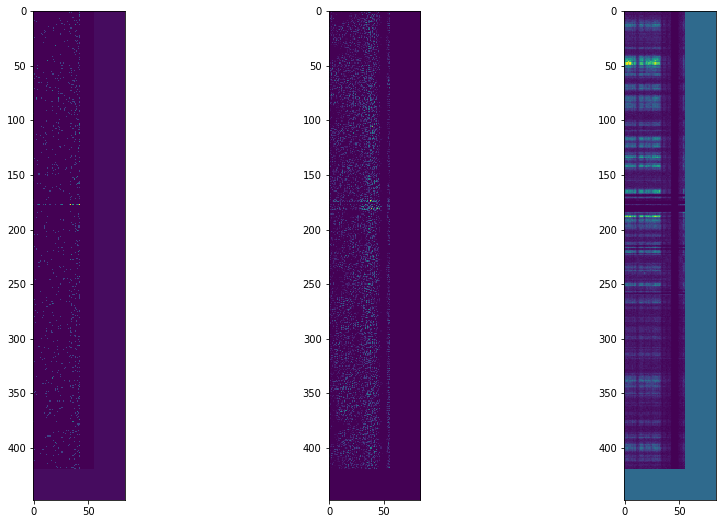

(16, 4, 28, 28)
shape:  (448, 112)
(16, 4, 28, 28)
(16, 4, 28, 28)


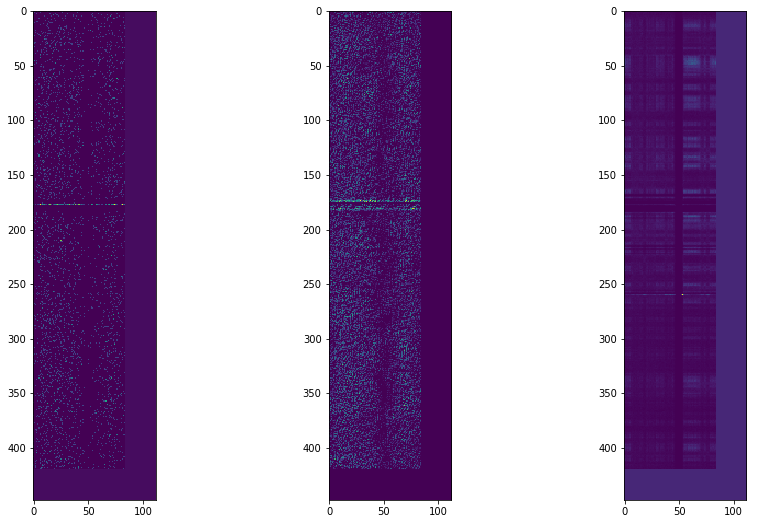

(16, 2, 28, 28)
shape:  (448, 56)
(16, 2, 28, 28)
(16, 2, 28, 28)


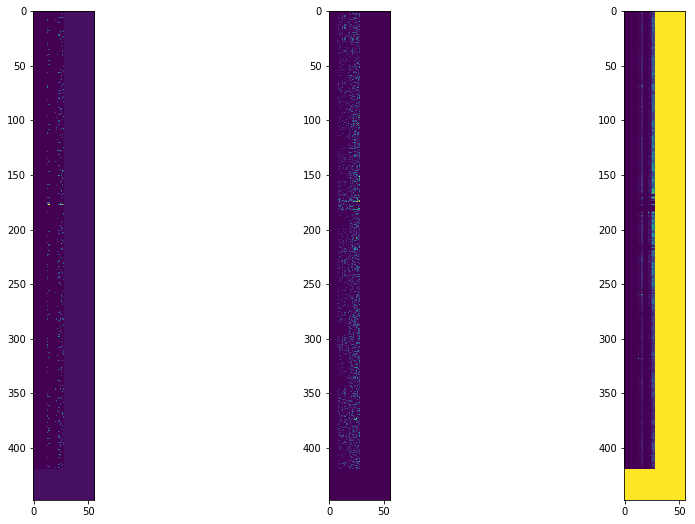

(16, 3, 28, 28)
shape:  (448, 84)
(16, 3, 28, 28)
(16, 3, 28, 28)


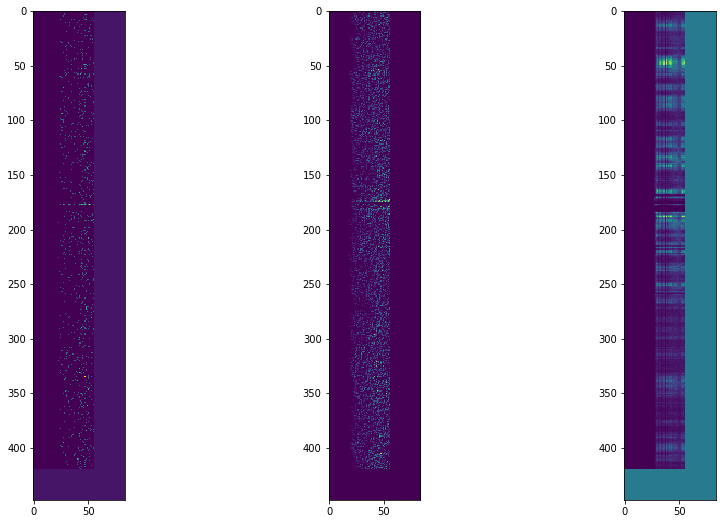

(16, 10, 28, 28)
shape:  (448, 280)
(16, 10, 28, 28)
(16, 10, 28, 28)


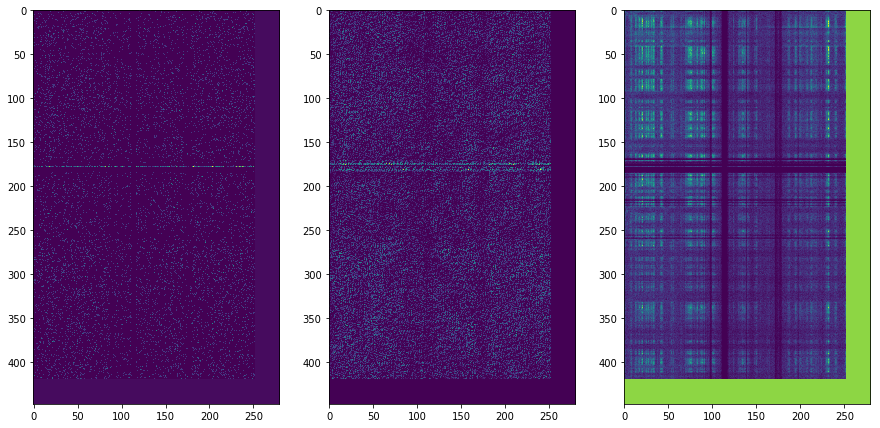

(13, 13, 28, 28)
shape:  (364, 364)
(13, 13, 28, 28)
(13, 13, 28, 28)


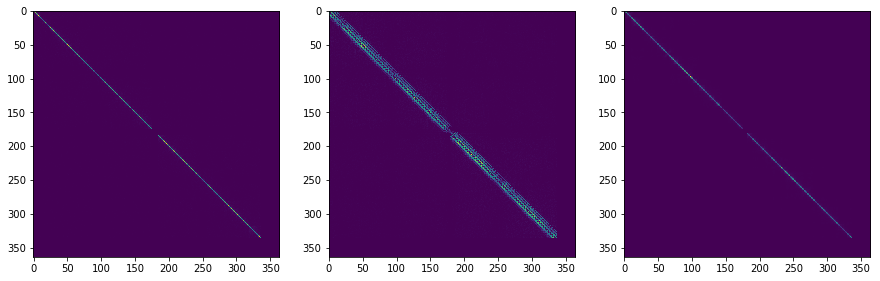

(13, 13, 28, 28)
shape:  (364, 364)
(13, 13, 28, 28)
(13, 13, 28, 28)


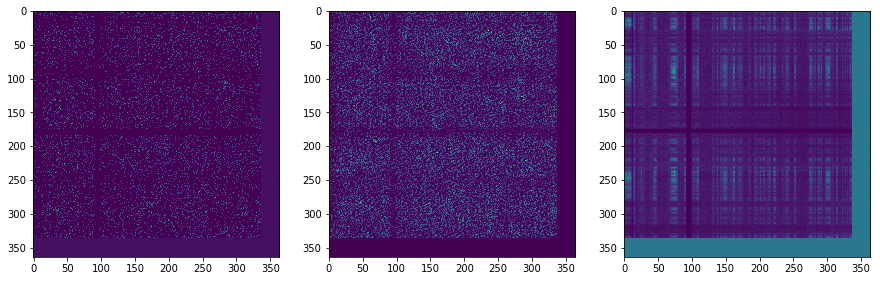

(13, 12, 28, 28)
shape:  (364, 336)
(13, 12, 28, 28)
(13, 12, 28, 28)


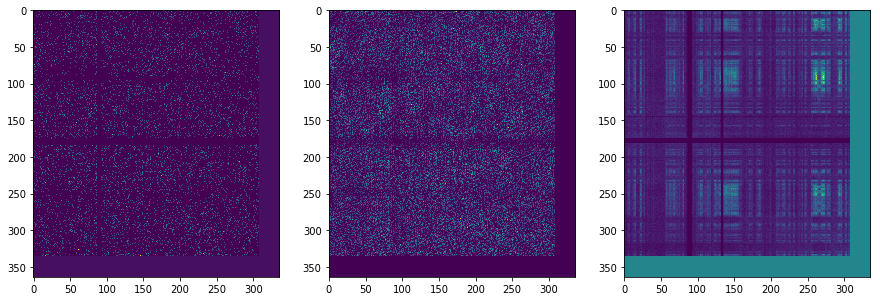

(13, 11, 28, 28)
shape:  (364, 308)
(13, 11, 28, 28)
(13, 11, 28, 28)


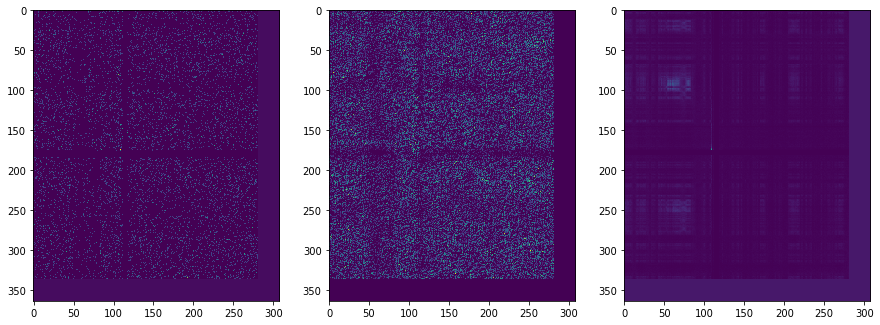

(13, 10, 28, 28)
shape:  (364, 280)
(13, 10, 28, 28)
(13, 10, 28, 28)


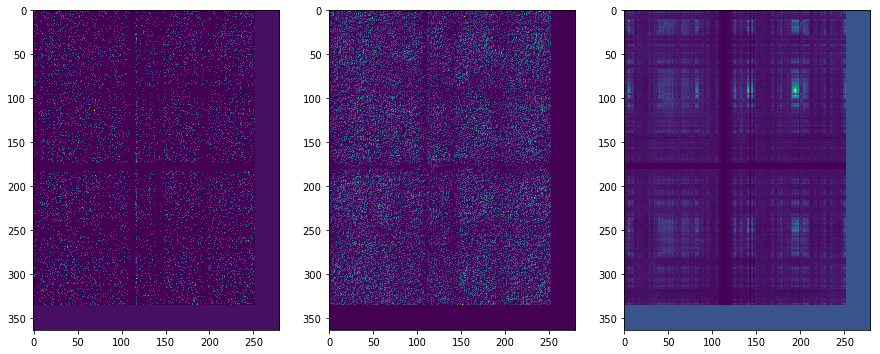

In [19]:
cacheIndex = 1
def mardas(cache, predicted, cacheIndex):
    sum = 0
    for i in range(cacheIndex):
       sum += cache[i][0] 
    N, cacheLow, cacheHigh = cache[cacheIndex]
    a1, a2, a3, a4, a5, a6, a7, a8, a9, a10 = cacheLow
    assert N == a9 * a10
    mout = predicted[sum:sum+N].reshape(a9, a10, 28, 28)
    #print(mout.shape )
    #mout = low_resolution_samples[:289, 0, 6:34, 6:34].reshape(17, 17, 28, 28)
    print(mout.shape )
    out = np.zeros((a9*28, a10*28))
    for i in range(a9-1):
        for j in range(a10-1):
            out[i*28:(i+1)*28, j*28:(j+1)*28] = mout[i, j]
    return out
#for cacheIndex in range(len(cache)):
for cacheIndex in range(40, 50):
    out0 = low_resolution_samples[:, 0, 6:34, 6:34]
    out0 = mardas(cache, out0, cacheIndex)
    print("shape: ", out0.shape)
    out1 = mardas(cache, predicted, cacheIndex)
    out2 = mardas(cache, Y, cacheIndex)
    ax = plt.subplot(1, 3, 1)
    ax.imshow(out0)   
    ax = plt.subplot(1, 3, 2)
    ax.imshow(out1)
    ax = plt.subplot(1, 3, 3)
    ax.imshow(out2)
    plt.show()

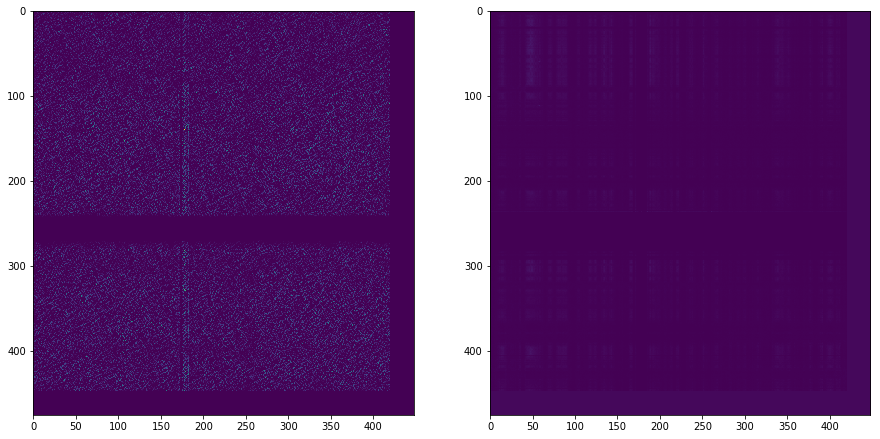